# Initialize


In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_bisection_np ,compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/20D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-11-13 14:01:08.886385: Importing os...
2024-11-13 14:01:08.886567: Importing sys...
Visible devices: [0]
2024-11-13 14:01:08.886802: Importing timer from timeit...
2024-11-13 14:01:08.886869: Setting env variables for tf import (only device(s) [0] will be available)...
2024-11-13 14:01:08.886992: Importing numpy...
2024-11-13 14:01:09.008565: Importing matplotlib...
2024-11-13 14:01:09.400883: Importing h5py...
2024-11-13 14:01:09.444166: Importing importlib.util...
2024-11-13 14:01:09.444255: Importing json...
2024-11-13 14:01:09.444320: Importing pandas...
2024-11-13 14:01:09.986143: Importing random...
2024-11-13 14:01:09.986281: Importing scipy utils...
2024-11-13 14:01:10.514249: Importing subprocess...
2024-11-13 14:01:10.514430: Importing tensorflow...
Tensorflow version: 2.16.1
2024-11-13 14:01:15.525679: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-11-13 14:01:16.876657: Importing timeit...
2024-11-13 14:01:16.876746: Importing tqdm...
2

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-11-13 14:01:23.288897: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-11-13 14:01:23.327568: All done.


In [3]:
import torch
import time

from falkon import LogisticFalkon
from falkon.kernels import GaussianKernel
from falkon.options import FalkonOptions
from falkon.gsc_losses import WeightedCrossEntropyLoss

from scipy.spatial.distance import pdist


# Model definition

In [4]:
seed = 0
ncomp = 5
ndims = 20
niter = 10000
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)
sample from dist_1:  tf.Tensor(
[[ 1.62246227 -1.12148208 -3.44534996  4.02194848  1.78776681  0.88094347
  -0.50568928 -0.93258241  0.96072818  3.18398396 -3.42493274  3.36118865
  -0.97008955 -3.80922336 -0.88678123 -1.74309765  1.4275693  -0.80163333
   0.77207225 -1.33233507]
 [-0.90576152 -2.92629119  0.09540144  3.39476591 -0.96077947  2.45882417
   1.71000076 -2.53187845 -3.05469271  1.09331411 -3.54069629  3.61418597
  -1.99533712 -6.54250726  1.51932671 -1.73641701 -0.51890038 -3.80921806
   2.25758194 -0.7973361 ]], shape=(2, 20), dtype=float64)
sample from dist_2:  tf.Tensor(
[[ 1.62246227 -1.12148208

# Fixed $n=m=10000$

## Null hypothesis

### Model definition

In [5]:
batch_size_test = 10000

In [6]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [7]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [8]:
NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                 progress_bar = True,
                                 verbose = True,
                                 M = 1000, 
                                 lam = 1e-6, 
                                 iter_list = 1000000,
                                 weight = 1) 

### Set up tests and metrics configurations

In [9]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,10000,10000,10000000,float64,0,False,False,None,True,...,20,0,True,20,0,float64,20,100000000,False,5


In [10]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncomp_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": 1000,
                                                  "lam": 1e-6,
                                                  "iter_list": 1000000,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$t_{\mathrm{NPLM}}$",
                                       "null_file": null_hypotheses_dir+"NPLM.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)

{'NPLM': {'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 1000, 'lam': 1e-06, 'iter_list': 1000000, 'weight': 1}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7fc3df050220>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 10000, 'batch_size_test': 10000, 'batch_size_gen': 10000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': False, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': True, 'ndims_1': 20, 'nsamples_1': 0, 'is_symb_2': True, 'ndims_2': 20, 'nsamples_2': 0, 'dtype': 'float64', 'ndims': 20, 'nsamples': 100000000, 'small_sample': False, 'ncomp': 5}, 'max_vectorize': 1000, 'latex': '$t_{\\mathrm{NPLM}}$', 'null_file': 'results/20D_unimodal/20D_10K/null_hypothesis/NPLM.json'}}
{'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 1000, 'lam': 1e-06, 'iter_list': 1000000, 'weight': 1},

### Evaluate null hypotheses

In [11]:
file = nplm_config["null_file"]
name = nplm_config["name"]
max_vectorize = nplm_config["max_vectorize"]
obj = eval(nplm_config["object_name"])
if os.path.exists(file):
     print(f"Loading {name} from {file}")
     obj.Results.load_from_json(file)
else:
    print(f"Computing and saving {name}")
    obj.Test_np()
    print(f"Saving {name} to {file}")
    obj.Results.save_to_json(file)

Loading nplm from results/20D_unimodal/20D_10K/null_hypothesis/NPLM.json


In [12]:
cl_list = [0.68, 0.95, 0.99]
null_times = []


name = nplm_config["name"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]

nsamples = obj.Inputs.batch_size_test
ns = nsamples**2 /(2*nsamples)
dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

metric_thresholds = [[cl, 
                        [int(cl*len(dist_null)), 
                        int((1-cl)*len(dist_null))], 
                        np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
print(f"ThresholdS for metric {nplm_config['name']}: {metric_thresholds}")
null_time = obj.Results[-1].__dict__['computing_time']
null_times.append([name, int(null_time)])
print(f"Computing time for metric {nplm_config['name']}: {null_time}")

nplm_config.update({"thresholds": metric_thresholds})
  
print(f"If you want to look into it the file to check is: {metrics_config_file}")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric nplm: [[0.68, [6800, 3199], 519.2958370974446], [0.95, [9500, 500], 565.8963779780311], [0.99, [9900, 100], 597.3220039407353]]
Computing time for metric nplm: 1384.9887541248463
If you want to look into it the file to check is: results/20D_unimodal/20D_10K/metrics_config.json


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 1000, 'lam': 1e-06, 'iter_list': 1000000...",metric_list,<function <lambda> at 0x7fc3df050220>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 10000, 'ba...",1000,$t_{\mathrm{NPLM}}$,results/20D_unimodal/20D_10K/null_hypothesis/N...,"[[0.68, [6800, 3199], 519.2958370974446], [0.9..."


### Plots of null-distributions

mu = 502.6435636731664 +/- 14.331402132441108
sigma = 37.856838394722175 +/- 0.2736627541361783
68%CL = 519.2958370974446, 95%CL = 565.8963779780311, 99%CL = 597.3220039407353
mu = 502.6435636731664 +/- 14.331402132441108
sigma = 37.856838394722175 +/- 0.2736627541361783


/tmp/ipykernel_767797/1770884078.py:65: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_767797/1770884078.py:67: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_767797/1770884078.py:95: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_767797/1770884078.py:101: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


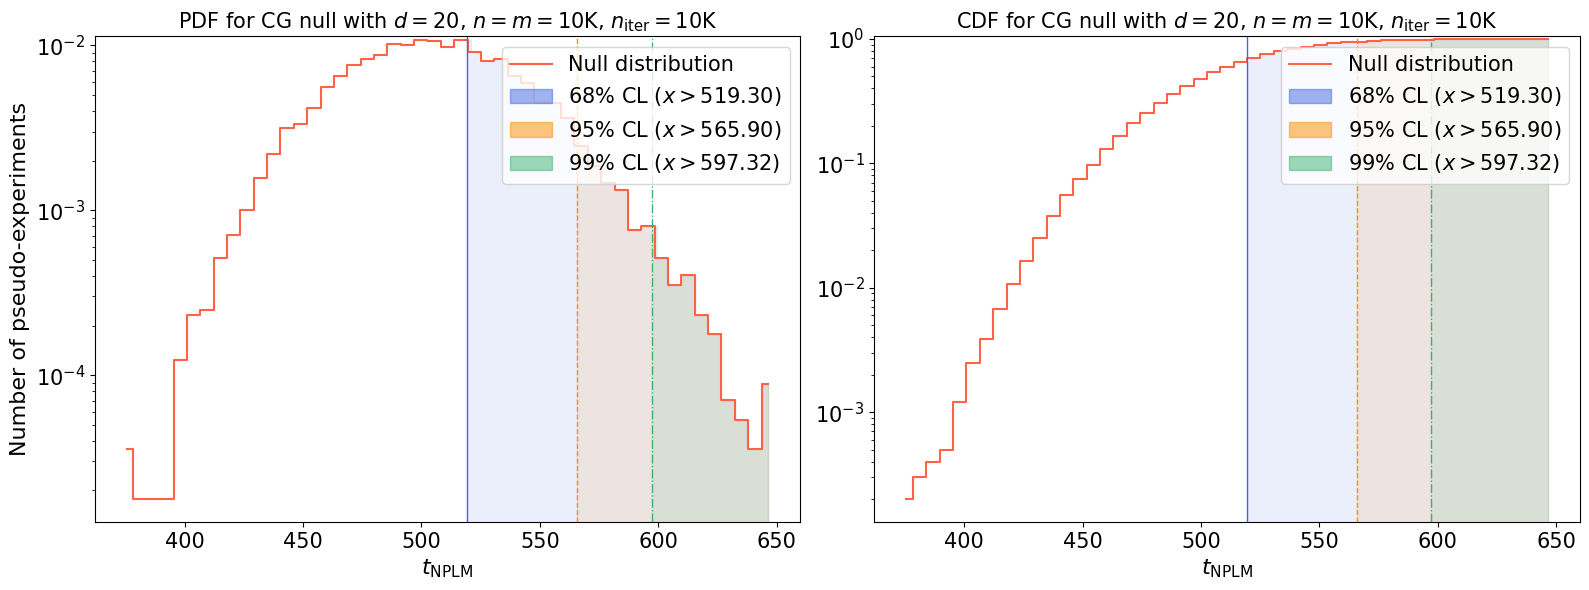

Time elapsed: 1.3006661359686404 seconds.


In [13]:

name = nplm_config["name"]
name_cap = name.upper()
latex = nplm_config["latex"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]
figure_file = nplm_config["null_file"].replace("json","pdf")
thresholds = nplm_config["thresholds"]

start = timer()

nsamples = obj.Inputs.batch_size_test
niter = obj.Inputs.niter
ns = nsamples**2 /(2*nsamples)
dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

scale = 'log'
num_bins = 50  # number of bins|

mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
print(f"mu = {mu} +/- {deltamu}")
print(f"sigma = {sigma} +/- {deltasigma}")
print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")

print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)

min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
x = np.linspace(min_x, max_x, num_bins + 1)
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
current_ylim0 = ax[0].get_ylim()

ax[0].set_yscale(scale)
ax[0].set_xlabel(r"%s"%latex, fontsize=16)
ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
ax[0].set_title('PDF for CG null with $d = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold

    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[0].set_ylim(current_ylim0)  
legend0 = ax[0].legend(loc='upper right', fontsize=15)
for handle in legend0.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges

ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
#ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
current_ylim1 = ax[1].get_ylim()

ax[1].set_yscale(scale)
ax[1].set_xlabel(r"%s"%latex, fontsize=16)
ax[1].set_title('CDF for CG null with $d = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold

    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[1].set_ylim(current_ylim1)  
#for i, threshold in enumerate(thresholds):
#    confidence, _, value = threshold
#    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")

legend1 = ax[1].legend(loc='upper right', fontsize=15)
for handle in legend1.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
plt.savefig(figure_file)
plt.show()
plt.close()

nplm_config.update({"null_figure": figure_file})

end = timer()
print("Time elapsed:", end-start, "seconds.")

#GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
    
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [15]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [16]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1
    for bound in bounds:
        try:
            result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == nplm_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_np(dist_1,
                                                    metric_config = nplm_config,
                                                    test_kwargs = test_kwargs,
                                                    model_dir = model_dir,
                                                    deformation = deformation,
                                                    seed_dist = 0,
                                                    x_tol = 0.01,
                                                    fn_tol = 0.05,
                                                    bound = bound,
                                                    eps_min = 0.,
                                                    eps_max = eps_max,
                                                    max_iterations = 50,
                                                    save = True,
                                                    filename = "exclusion_limits.json",
                                                    verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
        
print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [17]:
import notebooks.shared as shared

In [18]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [19]:
print(results_df[results_df["Deformation"] == "mean"])

  Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
2      nplm        mean   20  10000                10000   

  $\epsilon_{95\%\mathrm{CL}}$ $\epsilon_{99\%\mathrm{CL}}$   t (s)  \
2   $0.0575_{-0.023}^{+0.018}$  $0.07103_{-0.018}^{+0.017}$  $1030$   

                        95%CL                        99%CL  \
2  [0.03427, 0.0575, 0.07593]  [0.05308, 0.07103, 0.08788]   

                                                time  
2  [443.96671750117093, 282.96449962724, 303.2206...  


In [20]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs_nplm(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,nplm,$0.0575_{-0.023}^{+0.018}$,$0.07103_{-0.018}^{+0.017}$,$1030$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,nplm,$0.01744_{-0.0086}^{+0.0073}$,$0.02211_{-0.007}^{+0.0066}$,$1097$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,nplm,$0.00493_{-0.0023}^{+0.0019}$,$0.00649_{-0.0018}^{+0.0016}$,$1627$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,nplm,$0.0051_{-0.0022}^{+0.0018}$,$0.00643_{-0.0017}^{+0.0016}$,$1227$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,nplm,$0.00629_{-0.0025}^{+0.002}$,$0.00765_{-0.002}^{+0.0018}$,$1172$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,nplm,$0.14723_{-0.033}^{+0.019}$,$0.16327_{-0.021}^{+0.017}$,$932$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,nplm,$0.25377_{-0.058}^{+0.036}$,$0.28498_{-0.039}^{+0.026}$,$887$


In [21]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf CG model with $\\mathbf{d=20}$ and $\\mathbf{n=m=10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf CG model with $\mathbf{d=20}$ and $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.0575_{-0.023}^{+0.018}$ & $0.07103_{-0.018}^{+0.017}$ & $1030$ & $0.01744_{-0.0086}^{+0.0073}$ & $0.02211_{-0.007}^{+0.0066}$ & $1097$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00493_{-0.0023}^{+0.0019}$ & $0.00649_{-0.0018}^{+0.0016}$ & $1627$ & $0.0051_{-0.0022}^{+0

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics/notebooks/shared.py:554: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [22]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/20D_unimodal/20D_10K/results_table.tex


In [23]:
import re
      
# Path to the old metrics results table
file_path_other_metrics = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics/results/" + str(ndims) + "D_unimodal/" + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/results_table.tex"

with open(file_path_other_metrics, 'r') as file:
    table_other_metrics = file.read()

# for each metric I isolate the respective row and color in red NPLM. This is done in order to provide a table with the right ordering of the metrics

nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
	if "$t_{\mathrm{NPLM}}$" in line:
		nplm_rows.append("\\rowcolor{red!35}"+line)
	else:
		pass

sw_rows = []
lines_sw = table_other_metrics.splitlines()
for line in lines_sw:
	if "$t_{\mathrm{SW}}$" in line:
		sw_rows.append(line)
	else:
		pass

ks_rows = []
lines_ks = table_other_metrics.splitlines()
for line in lines_ks:
	if "$t_{\overline{\mathrm{KS}}}$" in line:
		ks_rows.append(line)
	else:
		pass

sks_rows = []
lines_sks = table_other_metrics.splitlines()
for line in lines_sks:
	if "$t_{\mathrm{SKS}}$" in line:
		sks_rows.append(line)
	else:
		pass

fgd_rows = []
lines_fgd = table_other_metrics.splitlines()
for line in lines_fgd:
	if "$t_{\mathrm{FGD}}$" in line:
		fgd_rows.append(line)
	else:
		pass

mmd_rows = []
lines_mmd = table_other_metrics.splitlines()
for line in lines_mmd:
	if "$t_{\mathrm{MMD}}$" in line:
		mmd_rows.append(line)
	else:
		pass

llr_rows = []
lines_llr = table_other_metrics.splitlines()
for line in lines_llr:
	if "$t_{\mathrm{LLR}}$" in line:
		llr_rows.append(line)
	else:
		pass

lines_old = table_other_metrics.splitlines()
new_lines = []
i = 0  

for lines in lines_old:
    if "$t_{\\mathrm{SW}}$" not in lines and "$t_{\\overline{\\mathrm{KS}}}$" not in lines and "$t_{\\mathrm{SKS}}$" not in lines and "$t_{\\mathrm{FGD}}$" not in lines and "$t_{\\mathrm{MMD}}$" not in lines and "$t_{\\mathrm{LLR}}$" not in lines:
        new_lines.append(lines)
    elif "$t_{\\mathrm{SW}}$" in lines:
        new_lines.append(lines)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_rows[i])
        new_lines.append(llr_rows[i])
        i = (i + 1) % len(nplm_rows)
    else:
        pass

updated_table = "\n".join(new_lines)

print(updated_table)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf CG model with $\mathbf{d=20}$ and $\mathbf{n=m=10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.10922_{-0.042}^{+0.046}$ & $0.14806_{-0.041}^{+0.045}$ & $839$ & $0.04571_{-0.017}^{+0.015}$ & $0.0619_{-0.014}^{+0.014}$ & $886$ \\
	$t_{\overline{\mathrm{KS}}}$ & $0.10878_{-0.041}^{+0.041}$ & $0.1457_{-0.039}^{+0.038}$ & ${\mathbf{395}}$ & $0.06569_{-0.024}^{+0.022}$ & $0.08903_{-0.021}^{+0.021}$ & ${\mathbf{439}}$ \\
	$t_{\mathrm{SKS}}$ & $0.11095_{-0.041}^{+0.042}$ & $0.14448_{-0.039}^{+0.042}$ & $754$ & $0.0585_{-0.021}^{+0.02}$ & $0.07738_{-0.019}^{+0.018}$ & $794$ \\
	$t_{\mathrm{FGD}}$ & ${\mathbf{0.10722_{-0.044}^{+0.053}}}$ & ${\mathbf{0.14391_{

In [24]:
shared.save_update_latex(updated_table, model_dir)

LaTeX table code has been written to results/20D_unimodal/20D_10K/results_table_updated.tex
